In [637]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import plotly.express as px
import re

>## Read and understand `global-video-games-sales` dataset 📑

In [640]:
#Read dataset
vgsales = pd.read_csv('../data/vgsales.csv')

In [641]:
#First 5 rows display
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [644]:
#Last 5 rows display
vgsales.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [646]:
#Display full informations about dataset
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [648]:
#Display describtion about numeric data on traspose (row, columns) mode for easy values compare
vgsales.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


In [650]:
#Display the shape of the dataset
print(f'Number of rows: {vgsales.shape[0]}')
print(f'Number of cols: {vgsales.shape[1]}')

Number of rows: 16598
Number of cols: 11


>## Missing & Duplicates Handling ✨

In [653]:
#Checking for missing values in the dataset
vgsales.isna().any()

Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

In [655]:
#Understand missing values places, percentage and shape
print(vgsales[vgsales[['Year', 'Publisher']].isna().values][['Year', 'Publisher']])
sum_of_nvl = vgsales.isna().values.sum()
percent_of_nvl = round((sum_of_nvl / np.multiply(vgsales.shape[0], vgsales.shape[1]) * 100),1)
print(f'Missing values percent is: {percent_of_nvl}')

         Year                               Publisher
179       NaN                         Electronic Arts
377       NaN                         Electronic Arts
431       NaN  Warner Bros. Interactive Entertainment
470       NaN                                     NaN
470       NaN                                     NaN
...       ...                                     ...
16427     NaN                                 Unknown
16493     NaN                                 Unknown
16494  2014.0                                     NaN
16543  2011.0                                     NaN
16553  2014.0                                     NaN

[329 rows x 2 columns]
Missing values percent is: 0.2


In [657]:
"""
Since the missing values are less than 1% of the
data I'll remove it from year and publisher columns
"""
vgsales.dropna(subset=['Year', 'Publisher'], inplace=True)

In [659]:
#Checking for missing values again
print(vgsales.isna().any())
print(vgsales.isna().values.sum())

Rank            False
Name            False
Platform        False
Year            False
Genre           False
Publisher       False
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool
0


In [661]:
#Checking duplicates 
vgsales.duplicated().sum()

0

> ## Explore problems and clean the dataset 🔎📄

In [664]:
#Checking unique values in Name column
print(vgsales['Name'].unique())
print(len(vgsales['Name'].unique()))

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ... 'Plushees'
 'Woody Woodpecker in Crazy Castle 5' 'Know How 2']
11325


In [666]:
#Rmove any additional spaces, special chars and check duplicates again
vgsales['Name'] = vgsales['Name'].apply(lambda val: " ".join(val.split()).lower())
vgsales["Name"] = vgsales["Name"].apply(lambda x: re.sub(r'[^a-zA-Z0-9 ]', '', x))
print(vgsales.duplicated().sum())
print(vgsales["Name"].sample(10))

0
7373     yugioh 5ds world championship 2011 over the nexus
14562                                                worms
12369                                   tron 20 killer app
15730                                 super speed machines
8797                                   mlb power pros 2008
6407                                    ultimate nes remix
2704                                      final fantasy ii
4347                        spiderman shattered dimensions
11594                            ape escape pumped  primed
12288                            paws  claws marine rescue
Name: Name, dtype: object


In [668]:
#Make type-conversion for the Year column from float to integer 
vgsales['Year'] = vgsales['Year'].astype(int)
vgsales['Year'].head()

0    2006
1    1985
2    2008
3    2009
4    1996
Name: Year, dtype: int32

> ## Feature Engineering 🛠️

In [671]:
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,wii sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,super mario bros,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,mario kart wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,wii sports resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,pokemon redpokemon blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [673]:
#Make a new column called Decade for filter games by released decade
#select min and max years value 
print(vgsales['Year'].min())
print(vgsales['Year'].max())

1980
2020


In [675]:
#Since the range of the released years from 1980s to 2020s
#I will define a var for decade ranges and var for indexs 
bin_ranges = [1979, 1989, 1999, 2009, 2019, 2029]
range_labels = ['1980s', '1990s', '2000s', '2010s', '2020s']
vgsales['Decade'] = pd.cut(vgsales['Year'], bins=bin_ranges, labels=range_labels)

In [677]:
#Check is Decade column
print(vgsales['Decade'].isna().sum())
vgsales[['Year', 'Decade']].head(10)

0


,Year,Decade
0,2006,2000s
1,1985,1980s
2,2008,2000s
3,2009,2000s
4,1996,1990s
5,1989,1980s
6,2006,2000s
7,2006,2000s
8,2009,2000s
9,1984,1980s


In [679]:
#Check missing values in Decade column
vgsales[vgsales['Decade'].isna().values]['Decade']

Series([], Name: Decade, dtype: category
Categories (5, object): ['1980s' < '1990s' < '2000s' < '2010s' < '2020s'])

In [681]:
#Check max and min global sales values
print(vgsales['Global_Sales'].max())
print(vgsales['Global_Sales'].min())

82.74
0.01


In [683]:
#Create a new column (feature) is_popular 
vgsales["is_popular"] = (vgsales["Global_Sales"] >= 1).astype(int)
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Decade,is_popular
0,1,wii sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2000s,1
1,2,super mario bros,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1980s,1
2,3,mario kart wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2000s,1
3,4,wii sports resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2000s,1
4,5,pokemon redpokemon blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1990s,1


In [685]:
# For each game, find which region (NA, EU, JP, Other) has the highest sales
# and store that region name in a new column called "Dominant_Region"

regions = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]
vgsales["Dominant_Region"] = vgsales[regions].idxmax(axis=1)
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Decade,is_popular,Dominant_Region
0,1,wii sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2000s,1,NA_Sales
1,2,super mario bros,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1980s,1,NA_Sales
2,3,mario kart wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2000s,1,NA_Sales
3,4,wii sports resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2000s,1,NA_Sales
4,5,pokemon redpokemon blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1990s,1,NA_Sales


In [687]:
#Create a new column called computer_global_sales to compare it with Global_Sales col
computer_global_sales = vgsales['NA_Sales'] + vgsales['JP_Sales'] + vgsales['EU_Sales'] + vgsales['Other_Sales']
print(np.isclose(vgsales['Global_Sales'], computer_global_sales, atol=0.1).all())

True


## Analysis and visualization part 📄📚
>### Question and answer with visualization ✨

In [690]:
print(vgsales.head())
print(vgsales['Genre'].unique())

   Rank                     Name Platform  Year         Genre Publisher  \
0     1               wii sports      Wii  2006        Sports  Nintendo   
1     2         super mario bros      NES  1985      Platform  Nintendo   
2     3           mario kart wii      Wii  2008        Racing  Nintendo   
3     4        wii sports resort      Wii  2009        Sports  Nintendo   
4     5  pokemon redpokemon blue       GB  1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales Decade  is_popular  \
0     41.49     29.02      3.77         8.46         82.74  2000s           1   
1     29.08      3.58      6.81         0.77         40.24  1980s           1   
2     15.85     12.88      3.79         3.31         35.82  2000s           1   
3     15.75     11.01      3.28         2.96         33.00  2000s           1   
4     11.27      8.89     10.22         1.00         31.37  1990s           1   

  Dominant_Region  
0        NA_Sales  
1        NA_Sales  
2 

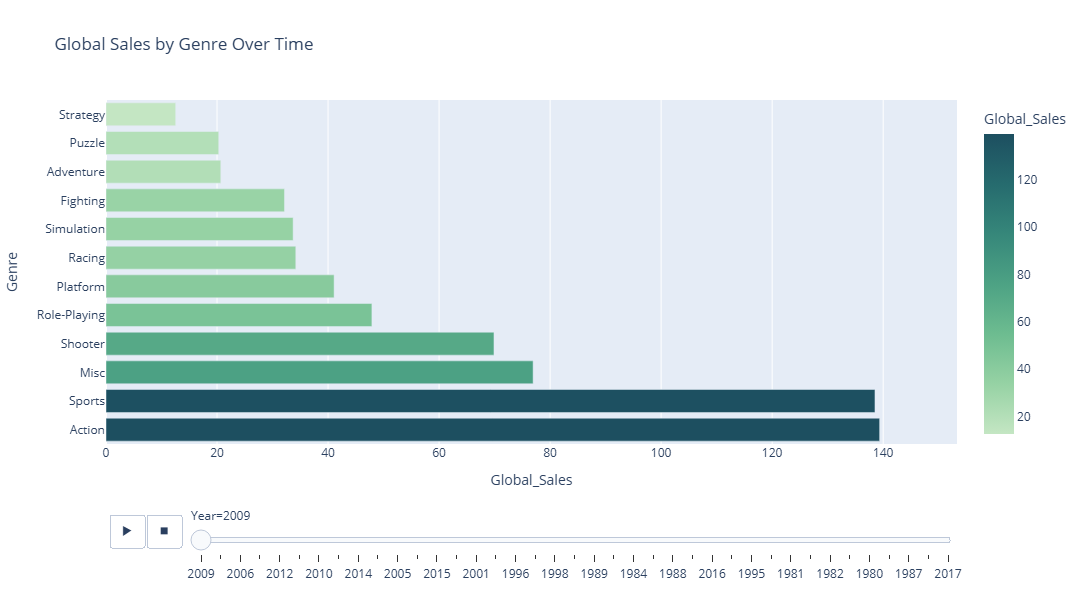

In [692]:
# Which genres have the highest global sales by year?
# (Bar chart: Genre vs Global_Sales)
# Group sales by Genre and Year
genre_year_sales = (
    vgsales.groupby(['Genre', 'Year'])['Global_Sales']
    .sum()
    .reset_index()
    .sort_values(by='Global_Sales', ascending=False)
)

# Create animated bar chart
fig = px.bar(
    data_frame=genre_year_sales,
    x='Global_Sales',
    y='Genre',
    color='Global_Sales',
    orientation='h',
    animation_frame='Year',
    height=600,
    color_continuous_scale=px.colors.sequential.Blugrn,
    title="Global Sales by Genre Over Time"
)

# Fix axis ranges to make yearly comparison fair
fig.update_layout(
    xaxis=dict(range=[0, genre_year_sales['Global_Sales'].max() * 1.1]),
    yaxis=dict(title="Genre"),
)

fig.show()


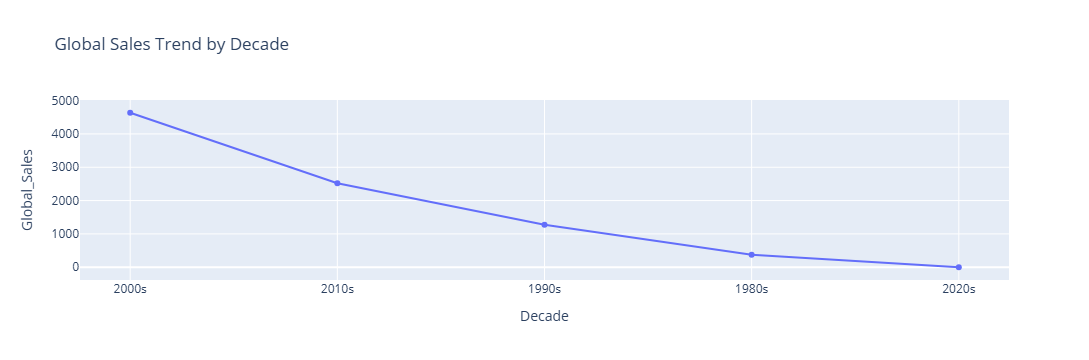

In [694]:
# How are sales distributed across decades?
# (Bar/Line chart: Decade vs Total Sales)

decade_sales = (
    vgsales.groupby('Decade',observed=True)['Global_Sales']
    .sum()
    .reset_index()
    .sort_values(by='Global_Sales', ascending=False)
)
px.line(decade_sales, x='Decade', y='Global_Sales', markers=True, title="Global Sales Trend by Decade")

In [696]:
#  Which publishers have the highest total sales?
# (Bar chart: Top 10 Publishers by Global_Sales)
top_publishers = (
  vgsales.groupby('Publisher')['Global_Sales']
  .sum()
  .reset_index()
  .sort_values(by='Global_Sales', ascending=False)
).head(10)

px.bar(
    data_frame=top_publishers,
    x='Publisher',
    y='Global_Sales',
    height=450,
    color='Global_Sales',
    color_continuous_scale=px.colors.sequential.Viridis,
    title='Top 10 Global Sales for Publishers',
)

In [697]:
# What is the proportion of popular games (is_popular) in each genre?
# (Stacked/Percentage Bar chart: Genre vs is_popular)

genre_popularity = (
    vgsales.groupby(['Genre', 'is_popular'])
    .size()
    .reset_index(name='Count')
)

# Stacked Bar Chart
px.bar(
    data_frame=genre_popularity,
    x='Genre',
    y='Count',
    color='is_popular', 
    title='Popular vs Non-Popular Games by Genre',
    height=500,
    barmode='stack',
)

In [698]:
# Which region dominates game sales most often?
# (Pie(donut): Dominant_Region distribution)

Dominant_Region_dist = (
    vgsales['Dominant_Region']
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .reset_index()
)
Dominant_Region_dist.columns = ['Region', 'Percentage']

px.pie(
    data_frame=Dominant_Region_dist,
    names='Region',
    values='Percentage',
    title='Distribution of Dominant Region (%)',
    hole=0.5,
    width=600,
    height=500

)

<Axes: xlabel='Dominant_Region', ylabel='Genre'>

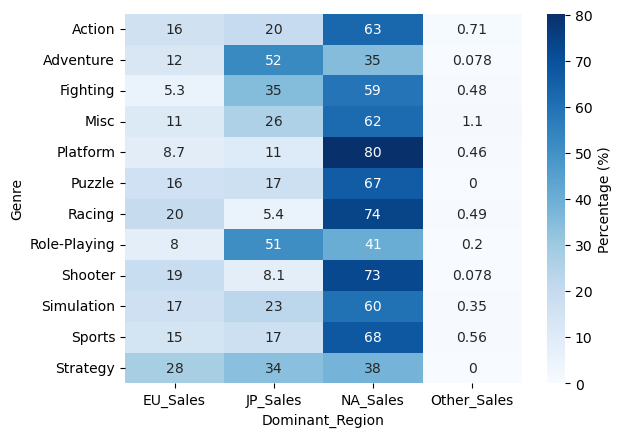

In [699]:
# Do certain genres dominate in specific regions?
# (Heatmap: Genre vs Dominant_Region)
heatmap_data = pd.crosstab(vgsales['Genre'], vgsales['Dominant_Region'], normalize='index') * 100
sns.heatmap(
    data=heatmap_data,
    annot=True,
    cmap="Blues",  
    cbar_kws={'label': 'Percentage (%)'}
)

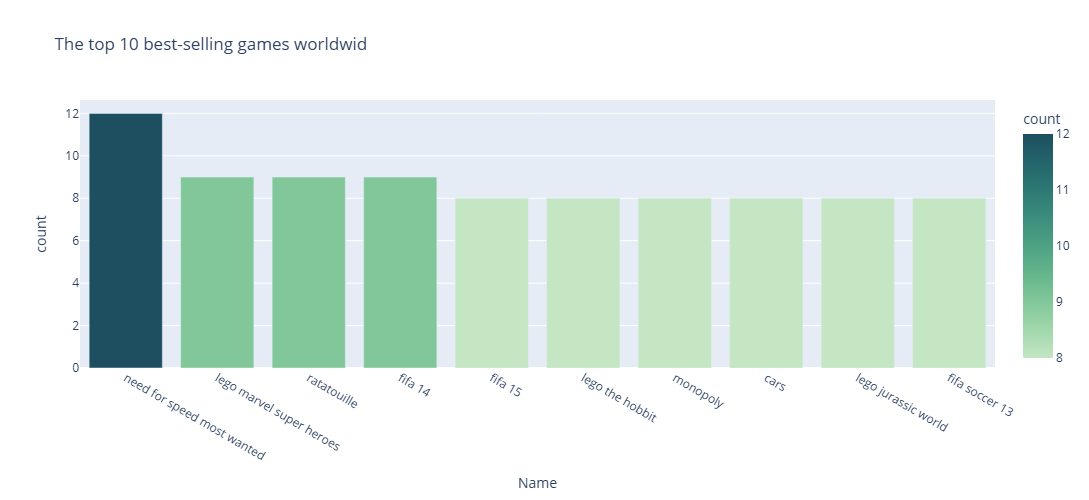

In [702]:
# What are the top 10 best-selling games worldwide?
# (Horizontal Bar chart: Top 10 by Global_Sales)

top_10_games = vgsales['Name'].value_counts().nlargest(10).reset_index()
px.bar(
    data_frame=top_10_games,
    x='Name',
    y='count',
    color='count',
    title='The top 10 best-selling games worldwid',
    height=500,
    color_continuous_scale=px.colors.sequential.Blugrn,
)

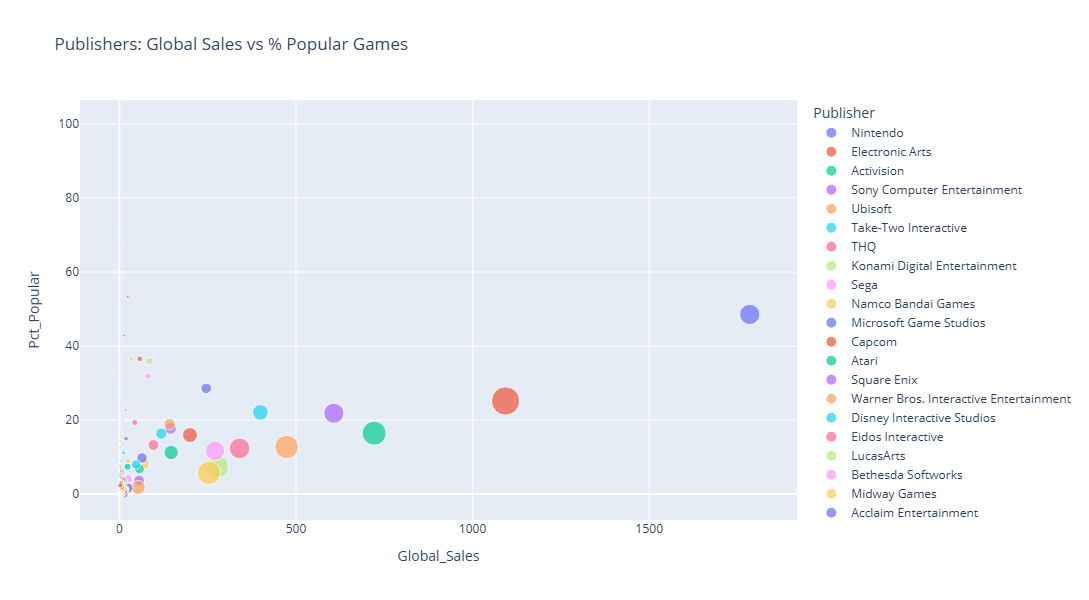

In [704]:
# Do top publishers produce more popular games than smaller ones?
# (Scatter plot: Publisher vs % Popular games)

# 1. Count total games & how many are popular per publisher
publisher_stats = (
    vgsales.groupby(['Publisher', 'is_popular'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

# 2. Rename columns for clarity
publisher_stats.columns = ['Publisher', 'Not_Popular', 'Popular']

# 3. Add total games + % popular
publisher_stats['Total_Games'] = publisher_stats['Not_Popular'] + publisher_stats['Popular']
publisher_stats['Pct_Popular'] = (publisher_stats['Popular'] / publisher_stats['Total_Games']) * 100

# 4. Merge with total Global Sales per publisher
publisher_sales = vgsales.groupby('Publisher')['Global_Sales'].sum().reset_index()
publisher_stats = publisher_stats.merge(publisher_sales, on='Publisher')

# 5. Sort by Global Sales (optional)
publisher_stats = publisher_stats.sort_values(by='Global_Sales', ascending=False)

publisher_stats.head(10)  # show top 10 publishers

px.scatter(
    publisher_stats,
    x='Global_Sales',
    y='Pct_Popular',
    size='Total_Games',
    color='Publisher',
    hover_name='Publisher',
    title='Publishers: Global Sales vs % Popular Games',
    height=600
)